File Handling

In [2]:
from typing import TextIO

data : TextIO = open("./requirements.txt") # connectivity with the file

print(type(data))

print(data.read()) # reads the whole document

data.close() # stops connectivity

<class '_io.TextIOWrapper'>
line1
line2


Opening files with "With" 

In [3]:
with open("./requirements.txt") as file:
    print(type(file))
    print(file.read())

print("nice")

<class '_io.TextIOWrapper'>
line1
line2
nice


File Handling Readline

In [ ]:
with open("./requirements.txt") as file:
    print(file.readline(), end = "") # reads one line
    print(file.readline())

print("nice")

line 1
line 2
nice


File Handling Readlines

In [ ]:
with open("./requirements.txt") as file:
    print(file.readlines()[:2]) # reads one line


print("nice")

['line1\n', 'line2']
nice


Default : R

In [ ]:
with open("./12.txt", "r") as file:
    print(file.read())
    #file.write("nice") #error

W

In [ ]:
with open("./12.txt", "w") as file:
    #print(file.read()) #error
    file.write("nice") 

#if there is no file with that name it makes a new file
#if there is a file it overrides it

R+

In [ ]:
with open("./12.txt", "r+") as file:
    print(file.read()) #cursor moves to the end
    file.write(" to meet you") ##cursor moves to the end
    print(file.read()) #cursor is in the end hence y it doesnt read anythng

    file.seek(0)
    print(file.read())

nice

nice to meet you


A

In [ ]:
with open("./a.txt", "a") as file:
    file.write("cool") 

#if there is no file with that name it makes a new file
#if there is a file it adds to it

Various Modes

Reading csv files

In [ ]:
import pandas as pd

df : pd.DataFrame = pd.read_csv("./data.csv")

print(df)

   id    name   lname  education
0   1   Ammar   Aamir       grad
1   2     Ali   Murad         no


Opening Images

Matplotlib is building the font cache; this may take a moment.


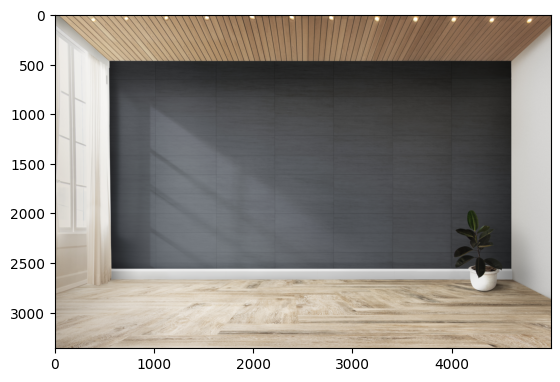

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("./1.jpg")
#print(img) displays result in numbers

plt.imshow(img)

Threading
(Single by default
Only runs one thread at a time
They run concurrently but not in parallel)

In [ ]:
import threading
import time

def eat_breakfast():
    time.sleep(2)
    print("breakfast done")

def drink_coffee():
    time.sleep(3)
    print("done drinking coffee")

def study():
    time.sleep(4)
    print("done studying")

eat_breakfast()
drink_coffee()
study()

print(threading.active_count()) #only one single main thread is running
print(threading.enumerate()) #to see which threads are running

breakfast done
done drinking coffee
done studying
6
[<_MainThread(MainThread, started 15372)>, <Thread(IOPub, started daemon 16528)>, <Heartbeat(Heartbeat, started daemon 4328)>, <ControlThread(Control, started daemon 9552)>, <HistorySavingThread(IPythonHistorySavingThread, started 1088)>, <ParentPollerWindows(Thread-4, started daemon 932)>]


Multi-Threading (Can run multiple tasks at once. We create new threads. Each thread will be incharge of each task. Better for IO based tasks)

In [ ]:
import threading
import time

def eat_breakfast():
    time.sleep(2) #io based task
    print("breakfast done")

def drink_coffee():
    time.sleep(3)
    print("done drinking coffee")

def study():
    time.sleep(4)
    print("done studying")

x = threading.Thread(target=eat_breakfast, args=())
x.start()

y = threading.Thread(target=drink_coffee, args=())
y.start()

z = threading.Thread(target=study, args=())
z.start()

print(threading.active_count()) #only one single main thread is running
print(threading.enumerate()) #to see which threads are running

9
[<_MainThread(MainThread, started 15372)>, <Thread(IOPub, started daemon 16528)>, <Heartbeat(Heartbeat, started daemon 4328)>, <ControlThread(Control, started daemon 9552)>, <HistorySavingThread(IPythonHistorySavingThread, started 1088)>, <ParentPollerWindows(Thread-4, started daemon 932)>, <Thread(Thread-7 (eat_breakfast), started 11112)>, <Thread(Thread-8 (drink_coffee), started 8220)>, <Thread(Thread-9 (study), started 14428)>]


breakfast done
done drinking coffee
done studying


Multi-Threading With Main Thread

In [ ]:
import threading
import time

def eat_breakfast():
    time.sleep(2)
    print("breakfast done")

def drink_coffee():
    time.sleep(3)
    print("done drinking coffee")

def study():
    time.sleep(4)
    print("done studying")

x = threading.Thread(target=eat_breakfast, args=())
x.start()

y = threading.Thread(target=drink_coffee, args=())
y.start()

z = threading.Thread(target=study, args=())
z.start()

x.join()
y.join()
z.join()

print(threading.active_count()) #only one single main thread is running
print(threading.enumerate()) #to see which threads are running

breakfast done
done drinking coffee
done studying
6
[<_MainThread(MainThread, started 15372)>, <Thread(IOPub, started daemon 16528)>, <Heartbeat(Heartbeat, started daemon 4328)>, <ControlThread(Control, started daemon 9552)>, <HistorySavingThread(IPythonHistorySavingThread, started 1088)>, <ParentPollerWindows(Thread-4, started daemon 932)>]


Single-Processing (By default)

In [ ]:
from multiprocessing import Process
import time

def counter(num):
    count = 0
    while count < num:
        count += 1

def main():
    a = Process(target=counter, args=(1000000000,))
    a.start()
    a.join()
    print("finished in", time.perf_counter(), "seconds")

main()

finished in 853194.4144069 seconds


In [ ]:
from multiprocessing import Process, cpu_count
import time


def counter(num):
    count = 0
    while count < num:
        count += 1


def main():

    print("cpu count:", cpu_count())

    a = Process(target=counter, args=(500000000,))
    b = Process(target=counter, args=(500000000,))

    a.start()
    b.start()

    print("processing...")

    a.join()
    b.join()

    print("finished in:", time.perf_counter(), "seconds")


main()

cpu count: 4
processing...


finished in: 853172.0515479 seconds


Time

In [ ]:
import time as t

time_now = t.localtime()
print(time_now)

print(f"Trasaction done at {time_now.tm_hour}h, {time_now.tm_min}min")

#calculating delivery time for 7 days

time_now1 = t.time()
print(time_now1) #time when time python was made

delivery_time = time_now1 + (86400 * 7) # secs in one day multi 7
reaching_time = t.localtime(delivery_time)

print(f"your item will be delievered on {reaching_time.tm_mon} month")

time.struct_time(tm_year=2023, tm_mon=11, tm_mday=2, tm_hour=22, tm_min=40, tm_sec=11, tm_wday=3, tm_yday=306, tm_isdst=0)
Trasaction done at 22h, 40min
1698946811.3879998
your item will be delievered on 11 month
